<a href="https://colab.research.google.com/github/JonathanAMP/StaTistics/blob/main/Jonathan_Mendez_Ponce_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas

In [1]:
%%capture 
!pip install wandb #Code that is able to make and install programs that make your code run.
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda')) #Data that is able to process the url and images from the google docs.

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()} #Code that is able to process the urls in the google docs 

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [4]:
url = "https://docs.google.com/presentation/d/1EV2T1wGRLyGyYQeR1BR3ekoi7ZHOL-IXCf1Wu-zANBE/edit#slide=id.g1a1a0967bc4_0_161" #The url of the google docs

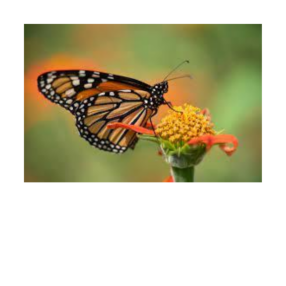

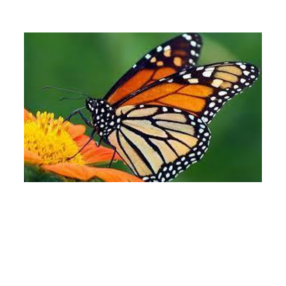

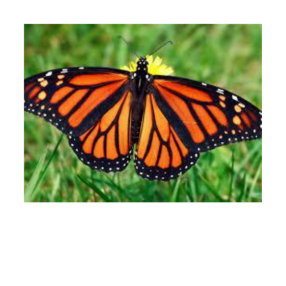

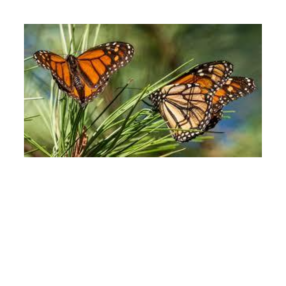

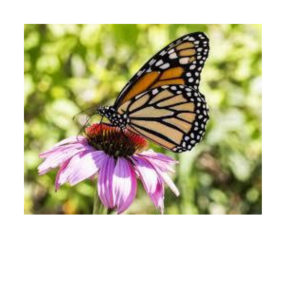

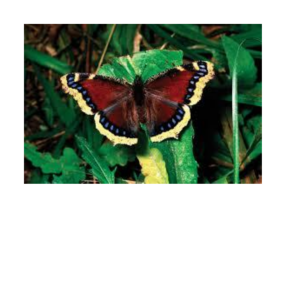

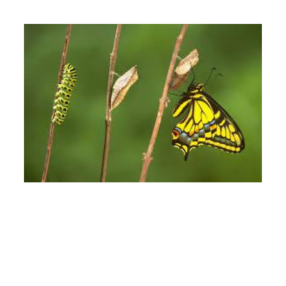

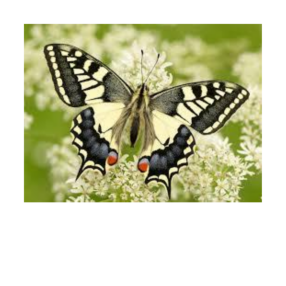

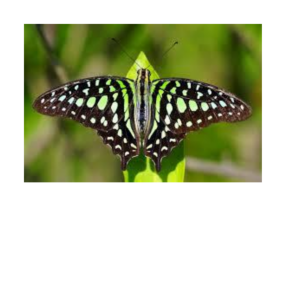

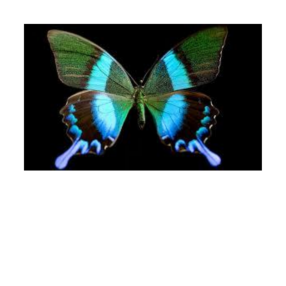

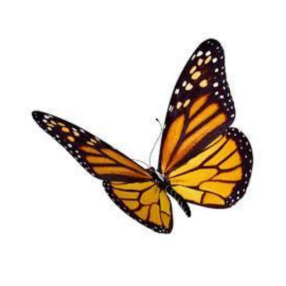

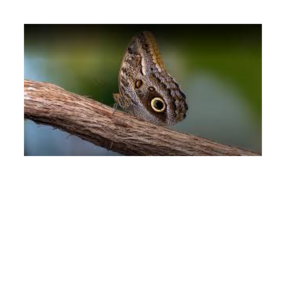

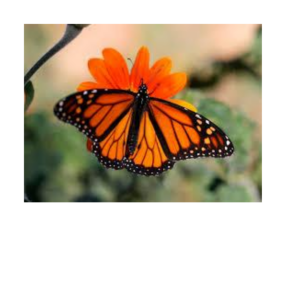

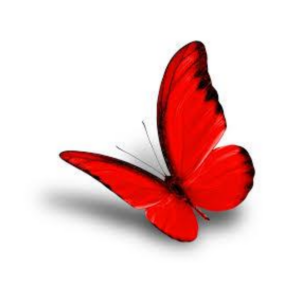

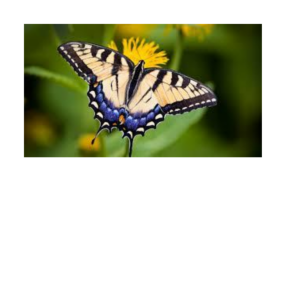

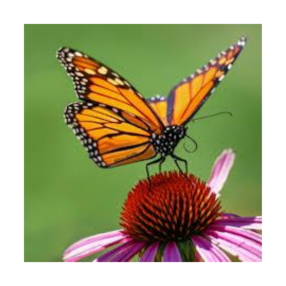

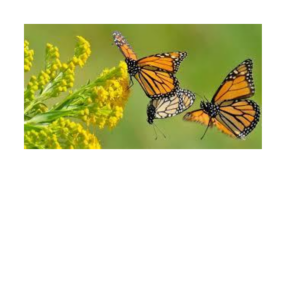

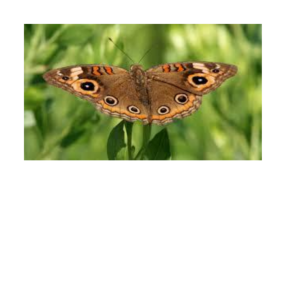

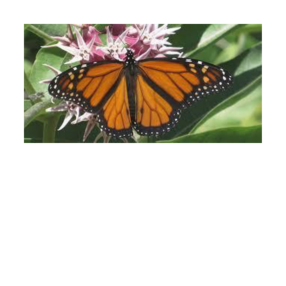

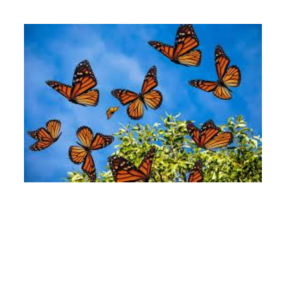

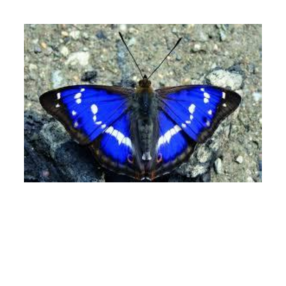

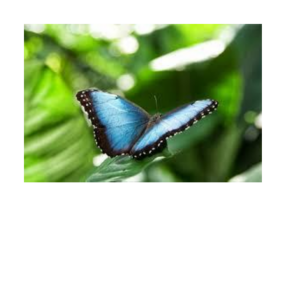

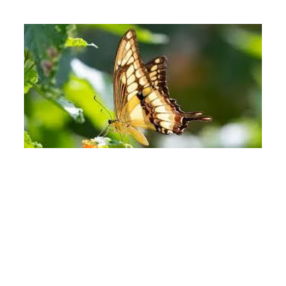

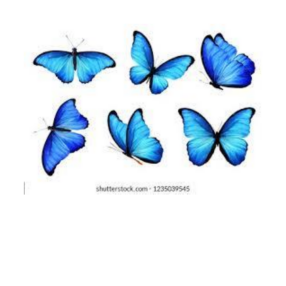

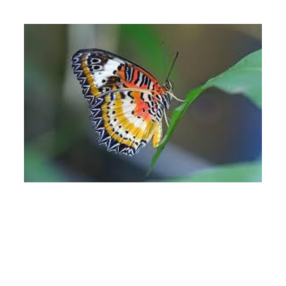

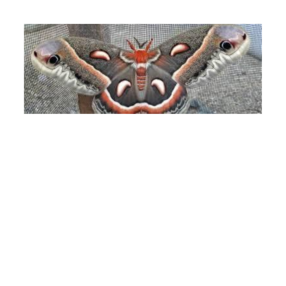

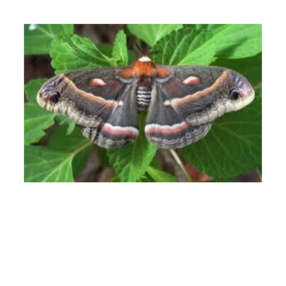

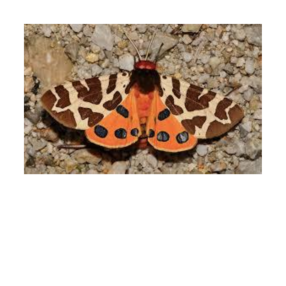

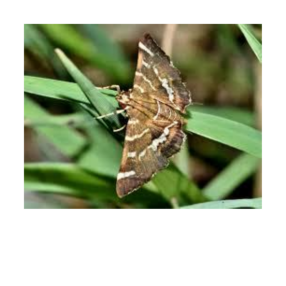

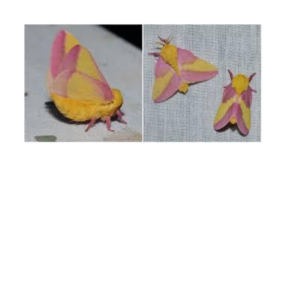

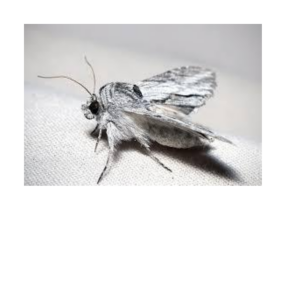

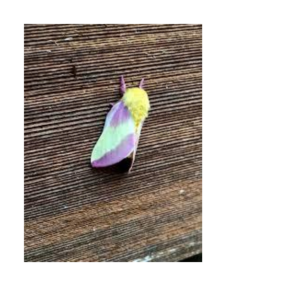

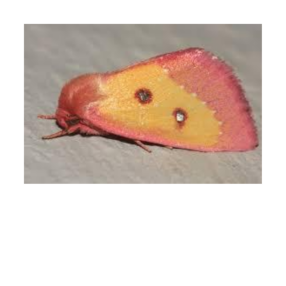

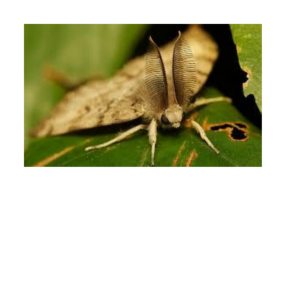

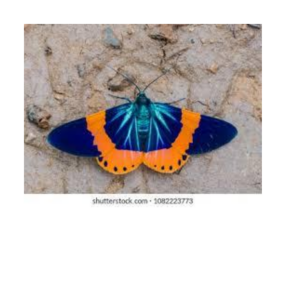

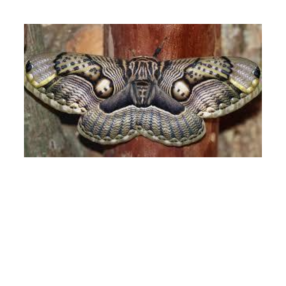

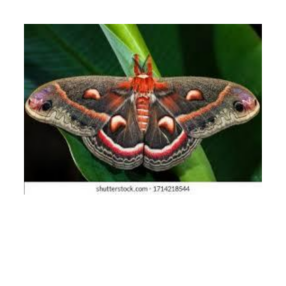

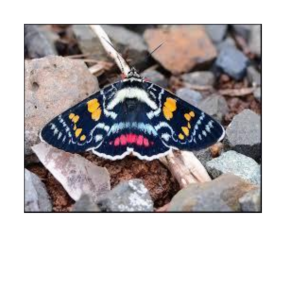

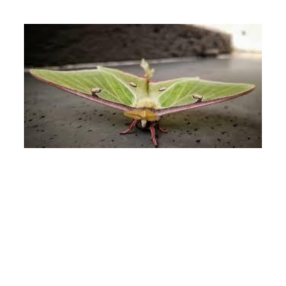

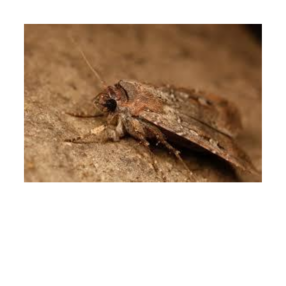

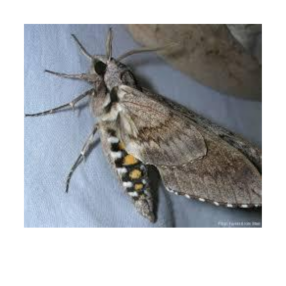

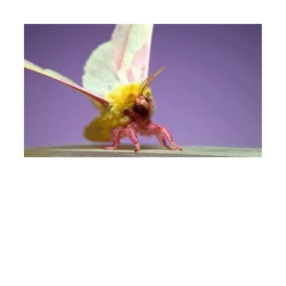

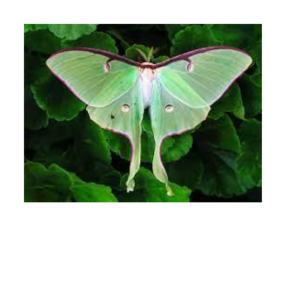

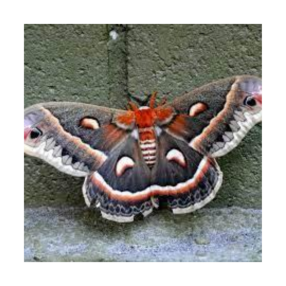

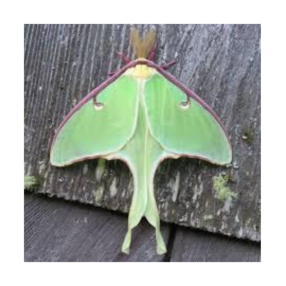

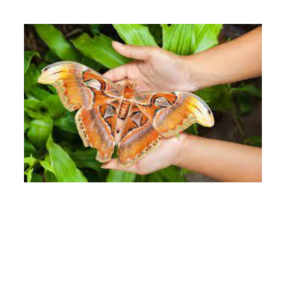

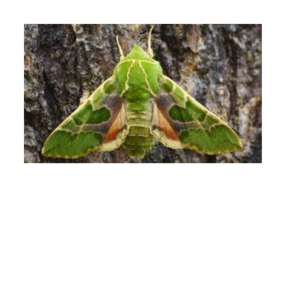

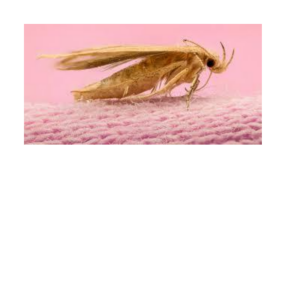

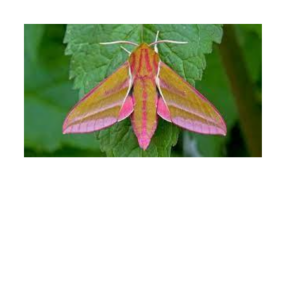

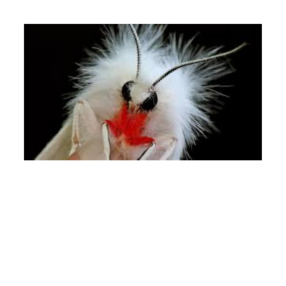

In [5]:
images = [] #The code to be able to display the images that were in the google docs.

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [6]:
images.shape #The sizes of the images that are displayed.

torch.Size([50, 3, 224, 224])

In [7]:
model(images) #The data that the images hold.

tensor([[-5.0993,  1.1386, -5.2665,  ..., -0.2657,  3.2293,  0.7193],
        [-5.3508,  0.1560, -4.9981,  ..., -4.0308,  4.0191,  0.1631],
        [-3.0919, -1.3470, -5.6492,  ...,  1.8967,  3.1159, -1.3305],
        ...,
        [ 0.2333,  2.0435, -1.4476,  ..., -1.5596,  2.8437,  2.8839],
        [-1.7174,  3.2186, -4.9544,  ..., -1.6387,  4.0882,  0.3342],
        [-4.5736,  3.0836, -3.3653,  ..., -6.4219,  2.2265,  3.8530]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [8]:
y = model(images) #Inizializing the variable to hold the images 

In [9]:
y.shape #The size of the images.

torch.Size([50, 1000])

In [10]:
guesses = torch.argmax(y, 1).cpu().numpy() #Initializing a variable 

In [11]:
for i in list(guesses): #A for loop that has the computer guesses of the images and how they look like.
    print(labels[i])

monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
binder, ring-binder
envelope
admiral
lacewing, lacewing fly
screen, CRT screen
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
fox squirrel, eastern fox squirrel, Sciurus niger
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
maraca
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
eft
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
pencil box, pencil case
hair slide
leaf beetle, chrysomelid
grasshopper, hopper
whistle
lycaenid, lycaenid butterfly
ski
African chameleon, Chama

In [12]:
Y = np.zeros(50,) #Inizializing variables.
Y[25:] = 1

In [13]:
Y #Checking the variables.

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
X = y.detach().cpu().numpy() #Initializing a variable.

In [15]:
X.shape #The highest point in the x axis.

(50, 1000)

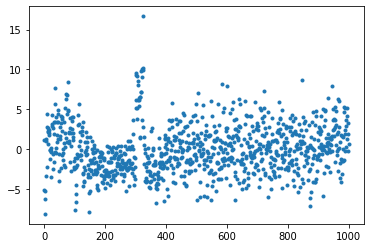

In [16]:
plt.plot(X[0],'.') #Plotting a graph with all the guesses as dots.

In [17]:
X[0] #Checking the first data block of the array.

array([-5.09927845e+00,  1.13855958e+00, -5.26654577e+00, -6.26296806e+00,
       -8.10897255e+00,  1.01808560e+00, -3.30599999e+00,  1.27033126e+00,
        2.76061893e+00, -2.23212457e+00,  4.38621330e+00,  2.65058231e+00,
        2.23050594e+00,  6.37365103e-01,  2.10710907e+00,  2.36060238e+00,
        2.00873590e+00,  1.73217511e+00, -1.36234522e-01, -8.58014151e-02,
       -1.20619607e+00, -3.00248891e-01, -3.52810144e+00,  1.53095365e-01,
       -1.63034171e-01,  4.35235357e+00,  3.12663937e+00,  2.91242695e+00,
        2.70654774e+00, -2.53456759e+00, -6.13866210e-01, -1.58630037e+00,
        3.45201492e+00,  1.94280899e+00, -3.41976345e-01,  3.43773317e+00,
        5.63949203e+00,  7.68514109e+00,  4.08786106e+00,  1.36333376e-01,
       -4.56102878e-01,  3.40848041e+00,  8.68218899e-01,  1.83780503e+00,
        3.37353396e+00,  4.92850971e+00,  1.24708498e+00,  4.44811153e+00,
       -3.94261289e+00, -2.75634193e+00, -5.52341282e-01,  1.22485399e+00,
        2.73087692e+00,  

In [18]:
np.argmax(X[0]) #The number one guess that was given most frequently.

323

In [19]:
labels[323] #Gives th ename of the data of the most frequent guess.

'monarch, monarch butterfly, milkweed butterfly, Danaus plexippus'

In [20]:
top_ten = np.argsort(X[0])[::-1][0:10] #The ten most frequent guesses that the data has.

In [21]:
  for i in top_ten: #A for loop to see the top ten guesses the computer made.
    print(labels[i])

monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
sulphur butterfly, sulfur butterfly
admiral
lycaenid, lycaenid butterfly
lacewing, lacewing fly
long-horned beetle, longicorn, longicorn beetle
ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle
leaf beetle, chrysomelid
ringlet, ringlet butterfly
table lamp


(array([ 19., 113., 312., 303., 170.,  60.,  16.,   6.,   0.,   1.]),
 array([-8.108973 , -5.630275 , -3.151577 , -0.6728792,  1.8058186,
         4.2845163,  6.763214 ,  9.241912 , 11.72061  , 14.199307 ,
        16.678005 ], dtype=float32),
 <a list of 10 Patch objects>)

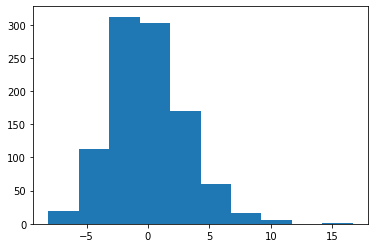

In [22]:
plt.hist(X[0]) #Creating a histogram that is able to compare the amount of names were picked.

In [23]:
X = GPU_data(X) #Initializing variables.
Y = GPU_data(Y)

In [24]:
def softmax(x): #Creating a function that have a formula.
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [25]:
def cross_entropy(outputs, labels):            #Creating a function that uses the output and labels. 
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [26]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [27]:
def Truncated_Normal(size): #Function to create a graph that will help later in the code.

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [28]:
def acc(out,y): #Creating a fucntion where it uses the shape of the images to run data.
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [29]:
X.shape #Checking the variable.

torch.Size([50, 1000])

In [30]:
def get_batch(mode): #Creating a fucntion.
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [31]:
def model(x,w): #Creating a function.

    return x@w[0]

In [32]:
def make_plots(): #Creating a function.
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1"); #This is where the code uses another website to create graphs that see the accurancy of the data with each run.
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


wandb: Currently logged in as: jonathanamp. Use `wandb login --relogin` to force relogin


<ipython-input-2-67fd63f8c31f>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda')) #Data that is able to process the url and images from the google docs.


https://tensorspace.org/

Best: 

Amber-Snowball-8 with 72%

Worst:

Solar-water-6 with 51%

Average:

55%